In [ ]:
!pip install opencv-python
!pip install face_recognition
!pip install pillow
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=c8a8d32265a03c7bf5e1e7fce781cc5b724b13592b5d8c8155ba33e6e3782567
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import PIL # Pillow (photos)
from PIL import Image
import glob # For picking all images in folder
import cv2
from cv2 import imwrite
import imutils
import os

try:
  os.mkdir('resized_images')
except:
  print('Folder already created')

n = 0
for fname in glob.glob('*.jpg'):
  image = Image.open(fname)
  image = np.array(image)
  image = imutils.resize(image, width=300) # image maintaining aspect ratio
  image = image[:,:,::-1] # bgr to rgb
  # image = PIL.Image.fromarray(image) 
  cv2.imwrite(f'resized_images/{n}.jpg', image)
  n = n + 1
  print(fname)


Folder already created
rock2.jpg
rock.jpg
brad.jpg
brad2.jpg
leo.jpg


resized_images/1.jpg


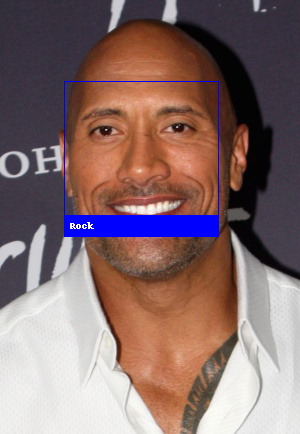

resized_images/0.jpg


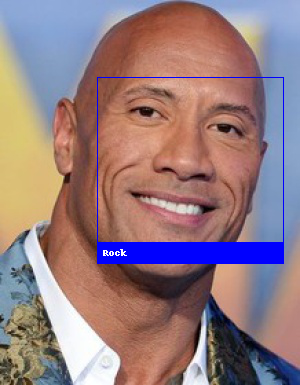

resized_images/2.jpg


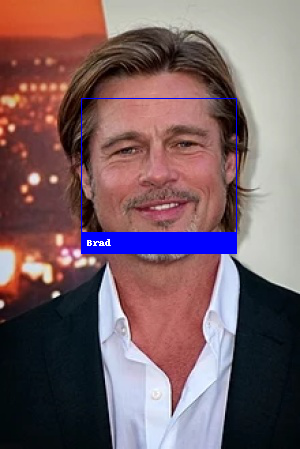

resized_images/3.jpg


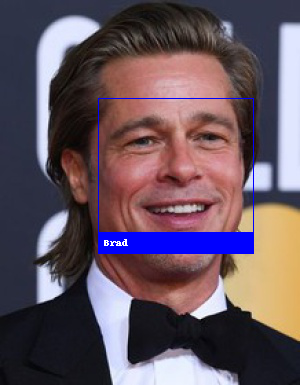

resized_images/4.jpg


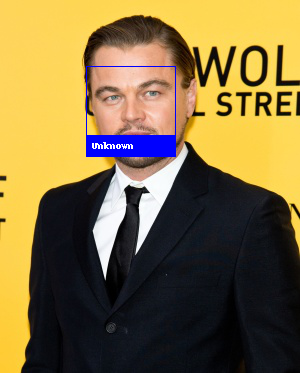

In [ ]:
import face_recognition
from PIL import Image, ImageDraw

# Running face recognition on multiple images

# Loading a sample picture and learn how to recognize it.
brad_image = face_recognition.load_image_file("brad.jpg")
brad_face_encoding = face_recognition.face_encodings(brad_image)[0]

# Loading a second sample picture and learn how to recognize it.
rock_image = face_recognition.load_image_file("rock.jpg")
rock_face_encoding = face_recognition.face_encodings(rock_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    brad_face_encoding,
    rock_face_encoding
]
known_face_names = [
    "Brad",
    "Rock"
]

image_list = glob.glob('resized_images/*.jpg')

for name in image_list:
  # Loading an image with an unknown 
  print(name)
  unknown_image = face_recognition.load_image_file(name)
  # Finding all the faces and face encodings in the unknown image
  face_locations = face_recognition.face_locations(unknown_image)
  face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

  # Converting the image to a PIL-format image to draw on top of it with the PIL
  # http://pillow.readthedocs.io/ PIL/Pillow documentation
  pil_image = Image.fromarray(unknown_image)
  # Create a Pillow ImageDraw Draw instance to draw with
  draw = ImageDraw.Draw(pil_image)

  # Loop through each face found in the unknown image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

      name = "Unknown"

      # If a match was found in known_face_encodings, just use the first one.
      # if True in matches:
      #     first_match_index = matches.index(True)
      #     name = known_face_names[first_match_index]

      # Or instead, use the known face with the smallest distance to the new face
      face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)
      if matches[best_match_index]:
          name = known_face_names[best_match_index]

      # Draw a box around the face using the Pillow module
      draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

      # Draw a label with a name below the face
      text_width, text_height = draw.textsize(name)
      draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
      draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

  # Display the resulting image
  display(pil_image)
  # pil_image.show()